In [2]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from math import log, exp, sqrt, sin, cos, pi
%matplotlib inline

def rotcov(cov, th):
    th = np.deg2rad(th)
    R = np.array([[cos(th), -sin(th)], [sin(th), cos(th)]])
    return R.dot(cov).dot(R.T)

def bookstyle(ax):
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    ax.set_xticks([])
    ax.set_yticks([])

def tf(x, y, th):
    th = np.deg2rad(th)
    R = np.array([[cos(th), -sin(th)], [sin(th), cos(th)]])
    t = np.array([[x], [y]])
    return R, t

def ell(xy, cov, ax, n_std, facecolor='none', **kwargs):
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor=facecolor, **kwargs)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    transf = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(xy[0], xy[1])
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def nm(cov):
    ed = np.linalg.eig(cov)
    if (ed[0][0] < ed[0][1]):
        return ed[1][:, 0]
    else:
        return ed[1][:, 1]

In /home/ee904/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ee904/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ee904/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ee904/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ee904/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

## NDT Figures

In [3]:
# NDT
def NDTFigures(up, cp, uq, cq):
    upq = up - uq
    cpq = cp + cq

    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    bookstyle(ax)
    ell(up, cp, ax, 1, edgecolor='r', label='$p\;(1\sigma)$')
    ell(uq, cq, ax, 1, edgecolor='g', label='$q\;(1\sigma)$')
    ax.scatter(*up, c='r')
    ax.scatter(*uq, c='g')
    ax.set_xlim(-0.5, 3)
    ax.set_ylim(-0.5, 3)
    ax.set_aspect('equal')
    ax.legend(loc='upper right')

    ax = fig.add_subplot(132)
    bookstyle(ax)
    ell(upq, cpq, ax, 1, edgecolor='r', label='$p - q\;(1\sigma)$')
    ell(upq, cpq, ax, 2, edgecolor='g', label='$p - q\;(2\sigma)$')
    ell(upq, cpq, ax, 3, edgecolor='b', label='$p - q\;(3\sigma)$')
    ax.scatter(*upq)
    ax.plot([-2.8 * upq[0], 5 * upq[0]], [-2.8 * upq[1], 5 * upq[1]], c='purple', label='')
    ax.set_xlim(-1.7, 3)
    ax.set_ylim(-1.7, 3)
    ax.set_aspect('equal')
    ax.legend()

    ax = fig.add_subplot(133)
    bookstyle(ax)
    xmin, xmax = -2 * upq, 5 * upq
    x = np.linspace(-2 * upq, 5 * upq, 100)
    y = scipy.stats.multivariate_normal(upq, cpq).pdf(x)
    ax.plot([0, 0], [0, scipy.stats.multivariate_normal(upq, cpq).pdf([0, 0])], 'b:', lw=3, label='likelihood')
    ax.plot(np.linspace(-2/7, 5/7, 100), y, c='purple', label='pdf')
    ax.set_xlim(-0.4, 1.2)
    ax.set_ylim(-0.4, 1.2)
    ax.set_yticks([0, 1])
    ax.set_aspect('equal')
    ax.legend()
    print(scipy.stats.multivariate_normal(upq, cpq).pdf([0, 0]))

0.49173825271056026


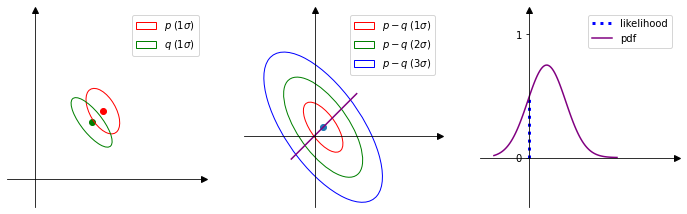

In [4]:
up = np.array([1.2, 1.2])
cp = np.array([[0.08956964, -0.0624375 ], [-0.0624375 , 0.16318393]])
uq = np.array([1, 1])
cq = np.array([[0.13287857, -0.12345357], [-0.12345357, 0.19375536]])
NDTFigures(up, cp, uq, cq)

## SNDT Figures

In [3]:
def SNDTFigures(up, cp, uq, cq):
    pn = -nm(cp)
    qn = -nm(cq)
    upq = up - uq
    cpq = cp + cq
    npq = (pn + qn) / np.linalg.norm(pn + qn)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(131)
    bookstyle(ax)
    ell(up, cp, ax, 1, edgecolor='r', label='$p\;(1\sigma)$')
    ell(uq, cq, ax, 1, edgecolor='g', label='$q\;(1\sigma)$')
    ax.annotate('', xy=up, xytext=up+pn, arrowprops=dict(edgecolor='r', arrowstyle="<-"))
    ax.annotate('', xy=uq, xytext=uq+qn, arrowprops=dict(edgecolor='g', arrowstyle="<-"))
    ax.scatter(*up, c='r')
    ax.scatter(*uq, c='g')
    ax.set_xlim(-0.5, 3)
    ax.set_ylim(-0.5, 3)
    ax.set_aspect('equal')
    ax.legend(loc='upper right')

    ax = fig.add_subplot(232)
    bookstyle(ax)
    ell(upq, cpq, ax, 1, edgecolor='r', label='$p - q\;(1\sigma)$')
    ell(upq, cpq, ax, 2, edgecolor='g', label='$p - q\;(2\sigma)$')
    ell(upq, cpq, ax, 3, edgecolor='b', label='$p - q\;(3\sigma)$')
    ax.scatter(*upq)
    ax.set_xlim(-1.7, 4.5)
    ax.set_ylim(-1.7, 4.5)
    ax.set_aspect('equal')
    ax.legend()

    ax = fig.add_subplot(235)
    bookstyle(ax)
    ax.annotate('', xy=[0, 0], xytext=pn, arrowprops=dict(edgecolor='r', arrowstyle='<-'))
    ax.annotate('', xy=pn, xytext=pn+qn, arrowprops=dict(edgecolor='g', arrowstyle='<-'))
    ax.annotate('', xy=[0, 0], xytext=pn+qn, arrowprops=dict(edgecolor='b', arrowstyle='<-'))
    ax.annotate('', xy=npq, xytext=[0, 0], arrowprops=dict(facecolor='b', edgecolor='b', width=1.5, headlength=7, headwidth=7))
    ax.annotate('$n_p$', [0.5, 0.2], size=12)
    ax.annotate('$n_q$', [1.3, 0.7], size=12)
    ax.annotate(r'$\frac{n_p+n_q}{\|n_p+n_q\|}$', [0.1, 0.5], size=16)
    x = np.linspace(0, 1, 100)
    y = np.sqrt(1 - x ** 2)
    ax.plot(x, y, 'k')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xlim(-0.3, 1.8)
    ax.set_ylim(-0.3, 1.3)
    ax.set_aspect('equal')

    ax = fig.add_subplot(133)
    bookstyle(ax)
    xmin, xmax = -5 * upq, 5 * upq
    mu = upq.dot(npq)
    sig = sqrt(npq.dot(cpq.dot(npq)))
    x = np.linspace(mu-3*sig-0.3, mu+3*sig+0.3, 100)
    y = scipy.stats.norm(mu, sig).pdf(x)
    ax.plot(x, y, c='purple', label='pdf')
    ax.plot([0, 0], [0, scipy.stats.norm(mu, sig).pdf(0)], 'b:', lw=3, label='likelihood')
    ax.set_xlim(mu-3*sig-0.3, mu+3*sig+0.3)
    ax.set_ylim(-0.3, 1.5)
    ax.set_yticks([0, 1])
    ax.set_aspect('equal')
    ax.legend(loc='upper right')
    print(scipy.stats.norm(upq.dot(npq), sqrt(npq.dot(cpq.dot(npq)))).pdf(0))

0.8651976859908911


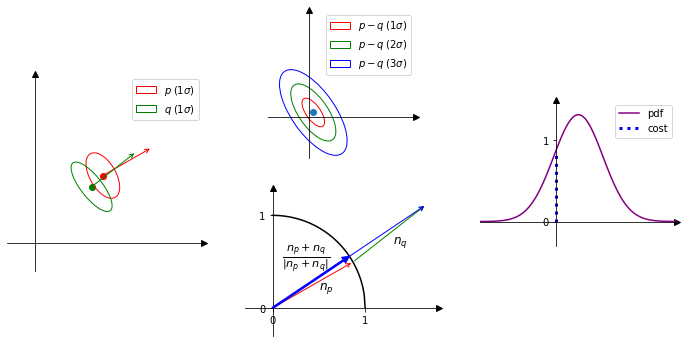

In [6]:
up = np.array([1.2, 1.2])
cp = np.array([[0.08956964, -0.0624375 ], [-0.0624375 , 0.16318393]])
uq = np.array([1, 1])
cq = np.array([[0.13287857, -0.12345357], [-0.12345357, 0.19375536]])
SNDTFigures(up, cp, uq, cq)

0.8651976859908911


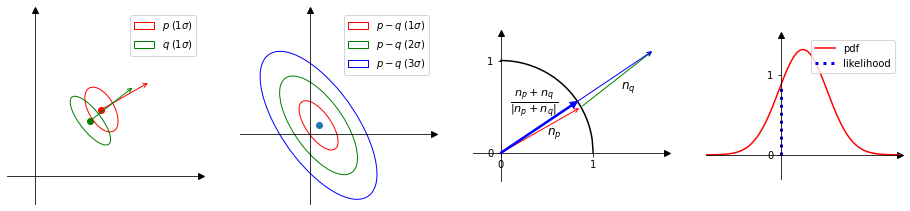

In [5]:
def SNDTFigures2(up, cp, uq, cq):
    pn = -nm(cp)
    qn = -nm(cq)
    upq = up - uq
    cpq = cp + cq
    npq = (pn + qn) / np.linalg.norm(pn + qn)

    fig = plt.figure(figsize=(16, 6))
    ax = fig.add_subplot(141)
    bookstyle(ax)
    ell(up, cp, ax, 1, edgecolor='r', label='$p\;(1\sigma)$')
    ell(uq, cq, ax, 1, edgecolor='g', label='$q\;(1\sigma)$')
    ax.annotate('', xy=up, xytext=up+pn, arrowprops=dict(edgecolor='r', arrowstyle="<-"))
    ax.annotate('', xy=uq, xytext=uq+qn, arrowprops=dict(edgecolor='g', arrowstyle="<-"))
    ax.scatter(*up, c='r')
    ax.scatter(*uq, c='g')
    ax.set_xlim(-0.5, 3)
    ax.set_ylim(-0.5, 3)
    ax.set_aspect('equal')
    ax.legend(loc='upper right')

    ax = fig.add_subplot(142)
    bookstyle(ax)
    ell(upq, cpq, ax, 1, edgecolor='r', label='$p - q\;(1\sigma)$')
    ell(upq, cpq, ax, 2, edgecolor='g', label='$p - q\;(2\sigma)$')
    ell(upq, cpq, ax, 3, edgecolor='b', label='$p - q\;(3\sigma)$')
    ax.scatter(*upq)
    ax.set_xlim(-1.7, 3)
    ax.set_ylim(-1.7, 3)
    ax.set_aspect('equal')
    ax.legend()

    ax = fig.add_subplot(143)
    bookstyle(ax)
    ax.annotate('', xy=[0, 0], xytext=pn, arrowprops=dict(edgecolor='r', arrowstyle='<-'))
    ax.annotate('', xy=pn, xytext=pn+qn, arrowprops=dict(edgecolor='g', arrowstyle='<-'))
    ax.annotate('', xy=[0, 0], xytext=pn+qn, arrowprops=dict(edgecolor='b', arrowstyle='<-'))
    ax.annotate('', xy=npq, xytext=[0, 0], arrowprops=dict(facecolor='b', edgecolor='b', width=1.5, headlength=7, headwidth=7))
    ax.annotate('$n_p$', [0.5, 0.2], size=12)
    ax.annotate('$n_q$', [1.3, 0.7], size=12)
    ax.annotate(r'$\frac{n_p+n_q}{\|n_p+n_q\|}$', [0.1, 0.5], size=16)
    x = np.linspace(0, 1, 100)
    y = np.sqrt(1 - x ** 2)
    ax.plot(x, y, 'k')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xlim(-0.3, 1.8)
    ax.set_ylim(-0.3, 1.3)
    ax.set_aspect('equal')

    ax = fig.add_subplot(144)
    bookstyle(ax)
    xmin, xmax = -5 * upq, 5 * upq
    mu = upq.dot(npq)
    sig = sqrt(npq.dot(cpq.dot(npq)))
    x = np.linspace(mu-3*sig-0.3, mu+3*sig+0.3, 100)
    y = scipy.stats.norm(mu, sig).pdf(x)
    ax.plot(x, y, c='red', label='pdf')
    ax.plot([0, 0], [0, scipy.stats.norm(mu, sig).pdf(0)], 'b:', lw=3, label='likelihood')
    ax.set_xlim(mu-3*sig-0.3, mu+3*sig+0.3)
    ax.set_ylim(-0.3, 1.5)
    ax.set_yticks([0, 1])
    ax.set_aspect('equal')
    ax.legend(loc='upper right')
    print(scipy.stats.norm(upq.dot(npq), sqrt(npq.dot(cpq.dot(npq)))).pdf(0))
up = np.array([1.2, 1.2])
cp = np.array([[0.08956964, -0.0624375 ], [-0.0624375 , 0.16318393]])
uq = np.array([1, 1])
cq = np.array([[0.13287857, -0.12345357], [-0.12345357, 0.19375536]])
SNDTFigures2(up, cp, uq, cq)

## Comparison: NDT vs. SNDT

In [8]:
def NDTSNDT(up, cp, uq, cq, th, ax=None):
    cp = rotcov(cp, th)
#     cq = rotcov(cq, -th / 2.)
    pn, qn = nm(cp), nm(cq)
    if (qn[0] < 0):
        qn = -qn
    if (pn.dot(qn) < 0):
        pn = -pn
    upq = up - uq
    cpq = cp + cq
    npq = (pn + qn) / np.linalg.norm(pn + qn)

    ndt = -exp(-0.1 * upq.dot(np.linalg.inv(cpq)).dot(upq))
    sndt = -exp(-0.1 * upq.dot(npq) * upq.dot(npq) / npq.dot(cpq.dot(npq)))
    if (ax):
        bookstyle(ax)
        ell(up, cp, ax, 1, edgecolor='r', label='$p\;(1\sigma)$')
        ell(uq, cq, ax, 1, edgecolor='g', label='$q\;(1\sigma)$')
        ax.annotate('', xy=up, xytext=up+pn, arrowprops=dict(edgecolor='r', arrowstyle="<-"))
        ax.annotate('', xy=uq, xytext=uq+qn, arrowprops=dict(edgecolor='g', arrowstyle="<-"))
        ax.scatter(*up, c='r')
        ax.scatter(*uq, c='g')
        ax.set_xlim(-0.5, 3)
        ax.set_ylim(-0.5, 3)
        ax.set_aspect('equal')
        ax.legend(loc='upper right')
    return ndt, sndt

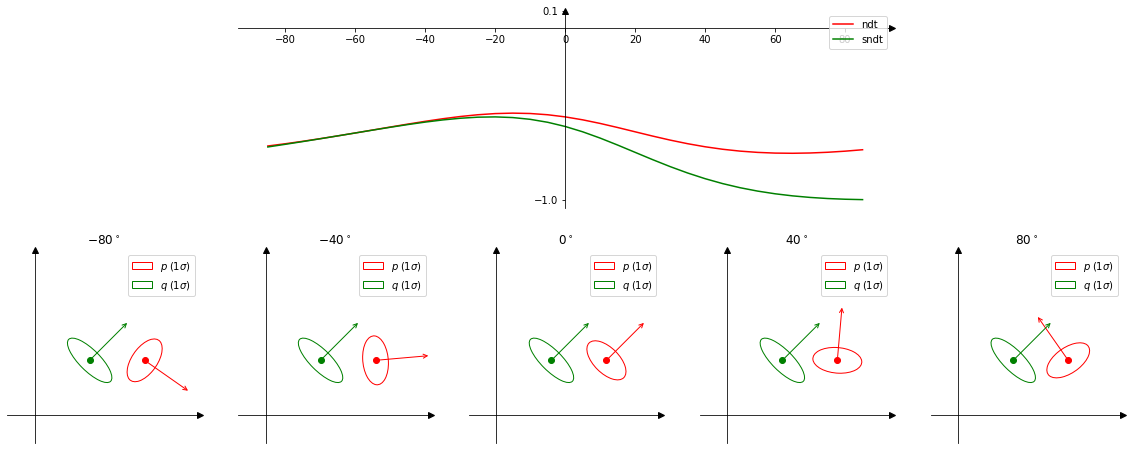

In [9]:
up = np.array([2, 1])
uq = np.array([1, 1])
cp = np.array([[0.12637678, -0.07247901], [-0.07247901, 0.12637678]])
cq = np.array([[0.16331697, -0.12715062], [-0.12715062, 0.16331697]])

ths = range(-85, 90, 5)
ndts, sndts = [], []
for th in ths:
    ndt, sndt = NDTSNDT(up, cp, uq, cq, th)
    ndts.append(ndt)
    sndts.append(sndt)
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(2, 5, (2, 4))
bookstyle(ax)
ax.plot(ths, ndts, 'r', label='ndt')
ax.plot(ths, sndts, 'g', label='sndt')
ax.set_xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80])
ax.set_yticks([-1, 0.1])
ax.legend()

for i in range(5):
    ax = fig.add_subplot(2, 5, i + 6)
    ang = -80 + 40 * i
    NDTSNDT(up, cp, uq, cq, ang, ax)
    ax.set_title(r'${}^\circ$'.format(ang))

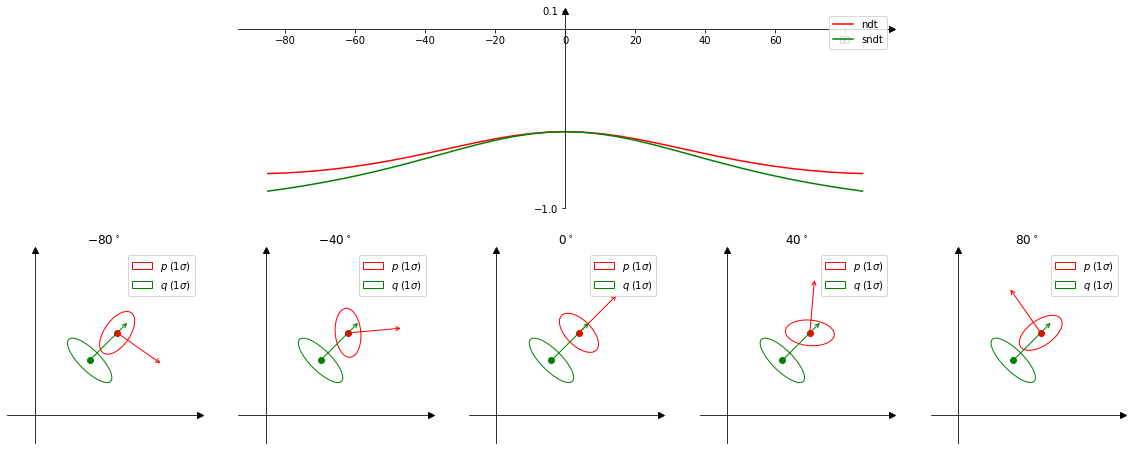

In [10]:
up = np.array([1.5, 1.5])
uq = np.array([1, 1])
cp = np.array([[0.12637678, -0.07247901], [-0.07247901, 0.12637678]])
cq = np.array([[0.16331697, -0.12715062], [-0.12715062, 0.16331697]])

ths = range(-85, 90, 5)
ndts, sndts = [], []
for th in ths:
    ndt, sndt = NDTSNDT(up, cp, uq, cq, th)
    ndts.append(ndt)
    sndts.append(sndt)
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(2, 5, (2, 4))
bookstyle(ax)
ax.plot(ths, ndts, 'r', label='ndt')
ax.plot(ths, sndts, 'g', label='sndt')
ax.set_xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80])
ax.set_yticks([-1, 0.1])
ax.legend()

for i in range(5):
    ax = fig.add_subplot(2, 5, i + 6)
    ang = -80 + 40 * i
    NDTSNDT(up, cp, uq, cq, ang, ax)
    ax.set_title(r'${}^\circ$'.format(ang))

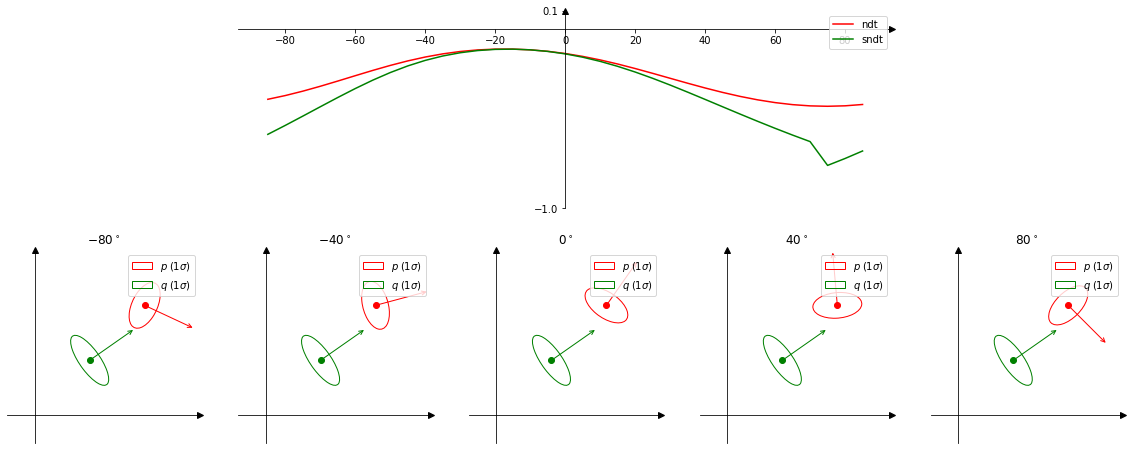

In [11]:
up = np.array([2, 2])
uq = np.array([1, 1])
cp = np.array([[0.12637678, -0.07247901], [-0.07247901, 0.12637678]])
cq = np.array([[0.16331697, -0.12715062], [-0.12715062, 0.16331697]])
cp = rotcov(cp, 10)
cq = rotcov(cq, -10)

ths = range(-85, 90, 5)
ndts, sndts = [], []
for th in ths:
    ndt, sndt = NDTSNDT(up, cp, uq, cq, th)
    ndts.append(ndt)
    sndts.append(sndt)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(2, 5, (2, 4))
bookstyle(ax)
ax.plot(ths, ndts, 'r', label='ndt')
ax.plot(ths, sndts, 'g', label='sndt')
ax.set_xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80])
ax.set_yticks([-1, 0.1])
ax.legend()

for i in range(5):
    ax = fig.add_subplot(2, 5, i + 6)
    ang = -80 + 40 * i
    NDTSNDT(up, cp, uq, cq, ang, ax)
    ax.set_title(r'${}^\circ$'.format(ang))

## Comparison: ICP vs. SICP

In [3]:
def ICPSICP(p, pn, q, qn, th, ax=None):
    th = np.deg2rad(th)
    R = np.array([[cos(th), -sin(th)], [sin(th), cos(th)]])
    pn = R.dot(pn)
    if (pn.dot(qn) < 0):
        pn = -pn
    pq = p - q
    npq = (pn + qn) / np.linalg.norm(pn + qn)

    icp = np.linalg.norm(pq)
    sicp = abs(pq.dot(npq))

    if (ax):
        bookstyle(ax)
        ax.scatter(*p, c='r', label='p')
        ax.scatter(*q, c='g', label='q')
        ax.annotate('', xy=p, xytext=p+pn, arrowprops=dict(edgecolor='r', arrowstyle="<-"))
        ax.annotate('', xy=q, xytext=q+qn, arrowprops=dict(edgecolor='g', arrowstyle="<-"))
        ax.set_xlim(-0.5, 3)
        ax.set_ylim(-0.5, 3)
        ax.set_aspect('equal')
        ax.legend(loc='upper right')
    return icp, sicp

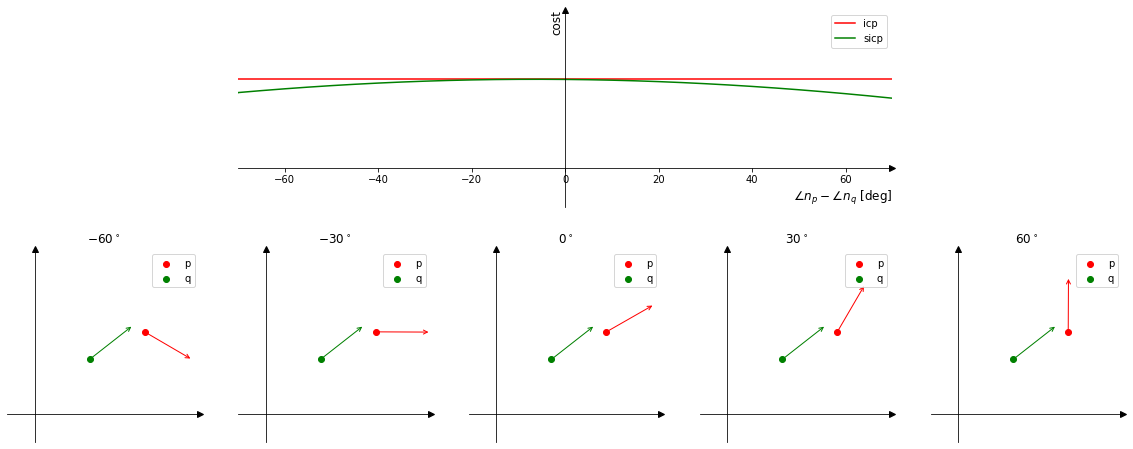

In [8]:
p = np.array([2, 1.5])
q = np.array([1, 1])
pn = np.array([0.8682833,  0.49606866])
qn = np.array([0.78720661, 0.61668935])

ths = np.arange(-85, 85, 5)
icps, sicps = [], []
for th in ths:
    icp, sicp = ICPSICP(p, pn, q, qn, th - 8.3345)
    icps.append(icp)
    sicps.append(sicp)
    

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(2, 5, (2, 4))
bookstyle(ax)
ax.plot(ths, icps, 'r', label='icp')
ax.plot(ths, sicps, 'g', label='sicp')
ax.set_xlabel(r'$\angle n_p-\angle n_q$ [deg]', loc='right', size=12)
ax.set_ylabel('cost', labelpad=2, loc='top', size=12)
# ax.set_xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80])
ax.set_xticks([-60, -40, -20, 0, 20, 40, 60])
ax.set_xlim(-70, 70)
ax.set_ylim(-0.5, 2)
ax.legend()

for i in range(5):
    ax = fig.add_subplot(2, 5, i + 6)
    ang = -60 + 30 * i
    ICPSICP(p, pn, q, qn, ang, ax)
    ax.set_title(r'${}^\circ$'.format(ang))

In [14]:
cp = np.array([[0.08956964, -0.0624375 ], [-0.0624375 , 0.16318393]])
cq = np.array([[0.13287857, -0.12345357], [-0.12345357, 0.19375536]])

In [15]:
np.arccos(nm(cp).dot(nm(cq)))

0.14546499596619575

In [16]:
th = 0.14546499596619575
R = np.array([[cos(th), -sin(th)], [sin(th), cos(th)]])
nm(R.dot(cp).dot(R.T)), nm(cq)

(array([-0.78720661, -0.61668935]), array([-0.78720661, -0.61668935]))

In [17]:
R.dot(cp).dot(R.T)

array([[ 0.10902614, -0.0703716 ],
       [-0.0703716 ,  0.14372743]])

In [18]:
print(nm(cp))

[-0.8682833  -0.49606866]


In [19]:
# cp = np.array([[0.10902614, -0.0703716], [-0.0703716 ,  0.14372743]])
cp = np.array([[0.13287857, -0.12345357], [-0.12345357, 0.19375536]])
print(np.arccos(-nm(cp).dot(np.array([sqrt(2)/2, sqrt(2)/2]))))
th = 0.12086801884481405
R = np.array([[cos(th), -sin(th)], [sin(th), cos(th)]])
R.dot(cp).dot(R.T)

0.12086799120351507


array([[ 0.16331697, -0.12715062],
       [-0.12715062,  0.16331696]])

In [20]:
nm(cp)

array([-0.78720661, -0.61668935])

In [21]:
np.array([sqrt(2)/2, sqrt(2)/2])

array([0.70710678, 0.70710678])

In [22]:
-nm(cp)

array([0.78720661, 0.61668935])

In [23]:
import sympy as sym
nx, ny = sym.symbols('n_x, n_y')
a, b, c = sym.symbols('a, b, c')
n = sym.Matrix([[nx], [ny]])
S = sym.Matrix([[a, b], [b, c]])
Id = ((n * n.T * S) / (n.T * S * n)[0])

In [24]:
Id

Matrix([
[(a*n_x**2 + b*n_x*n_y)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y)), (b*n_x**2 + c*n_x*n_y)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y))],
[(a*n_x*n_y + b*n_y**2)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y)), (b*n_x*n_y + c*n_y**2)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y))]])

In [25]:
Id2 = ((S * n * n.T) / (n.T * S * n)[0])

In [26]:
Id2

Matrix([
[n_x*(a*n_x + b*n_y)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y)), n_y*(a*n_x + b*n_y)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y))],
[n_x*(b*n_x + c*n_y)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y)), n_y*(b*n_x + c*n_y)/(n_x*(a*n_x + b*n_y) + n_y*(b*n_x + c*n_y))]])

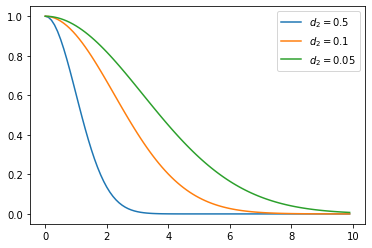

In [12]:
x = np.arange(0, 10, 0.1)
plt.plot(x, np.exp(-0.5 * x ** 2), label='$d_2 = 0.5$')
plt.plot(x, np.exp(-0.1 * x ** 2), label='$d_2 = 0.1$')
plt.plot(x, np.exp(-0.05 * x ** 2), label='$d_2 = 0.05$')
plt.legend()